In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregamento do dataset
data = load_iris()
X = data.data  # Variáveis preditoras
y = data.target  # Variável de destino


In [3]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Visualização básica
print("Exemplo de dados:")
print(pd.DataFrame(X, columns=data.feature_names).head())

Exemplo de dados:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [6]:
# Treinamento do modelo com Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

In [7]:
# Verificando a acurácia geral
print(f"Acurácia do modelo: {model.score(X_test, y_test):.2f}")

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

Acurácia do modelo: 1.00


In [9]:
def calcular_metricas(cm):
    VP = np.diag(cm)
    FP = cm.sum(axis=0) - VP
    FN = cm.sum(axis=1) - VP
    VN = cm.sum() - (FP + FN + VP)

    precisao = VP / (VP + FP)
    recall = VP / (VP + FN)
    especificidade = VN / (VN + FP)
    f_score = 2 * (precisao * recall) / (precisao + recall)

    return precisao, recall, especificidade, f_score

In [10]:

precisao, recall, especificidade, f_score = calcular_metricas(cm)

In [11]:
for i, classe in enumerate(data.target_names):
    print(f"\nClasse: {classe}")
    print(f"  Precisão: {precisao[i]:.2f}")
    print(f"  Recall (Sensibilidade): {recall[i]:.2f}")
    print(f"  Especificidade: {especificidade[i]:.2f}")
    print(f"  F-Score: {f_score[i]:.2f}")



Classe: setosa
  Precisão: 1.00
  Recall (Sensibilidade): 1.00
  Especificidade: 1.00
  F-Score: 1.00

Classe: versicolor
  Precisão: 1.00
  Recall (Sensibilidade): 1.00
  Especificidade: 1.00
  F-Score: 1.00

Classe: virginica
  Precisão: 1.00
  Recall (Sensibilidade): 1.00
  Especificidade: 1.00
  F-Score: 1.00


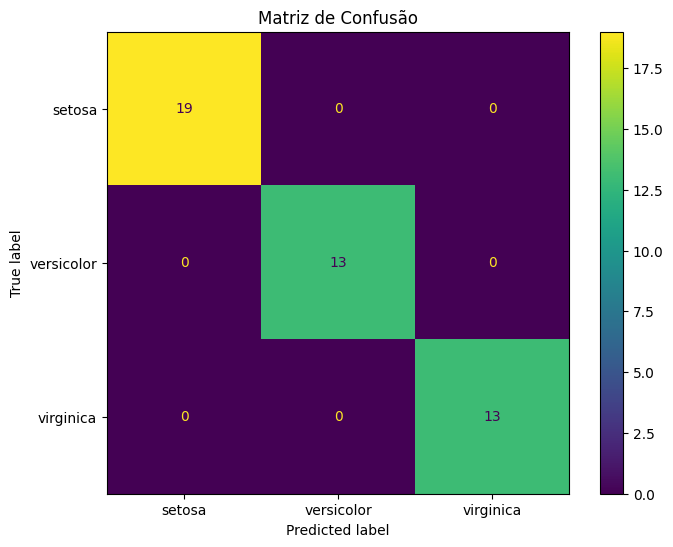

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='viridis', ax=ax)
plt.title("Matriz de Confusão")
plt.show()

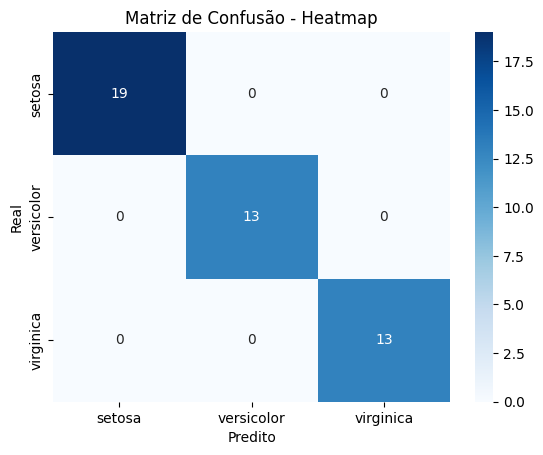

In [13]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Heatmap')
plt.show()

In [14]:
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Relatório de Classificação:\n")
print(report)

Relatório de Classificação:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

